In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import json
import csv
import seaborn as sns

from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [55]:
os.environ["CUAD_VISIBLE_DEVICES"]='0'
os.environ["CUAD_VISIBLE_DEVICES"]='1'

In [56]:
MMS = MinMaxScaler() # MinMaxScaler
le = LabelEncoder() # LabelEncoder
enc = OneHotEncoder() # OneHotEncoder

# 데이터셋 호출

In [57]:
axis = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Final/training_data.csv')
axis

,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,Robot_LeftFoot.X,...,Robot_RightLeg.X,Robot_RightLeg.Y,Robot_RightLeg.Z,Robot_RightFoot.X,Robot_RightFoot.Y,Robot_RightFoot.Z,Robot_RightToeBase.X,Robot_RightToeBase.Y,Robot_RightToeBase.Z,activity
0,0.014469,0.657318,-0.174980,-0.087715,0.570961,-0.207636,-0.258852,0.485350,0.207280,-0.270620,...,0.239237,0.563264,0.235140,0.234115,0.101813,0.307666,0.246179,-0.010447,0.399674,sit
1,0.015042,0.655393,-0.171119,-0.087102,0.568806,-0.203293,-0.257881,0.486372,0.212413,-0.269969,...,0.239013,0.565066,0.239753,0.234339,0.104257,0.316286,0.246404,-0.007073,0.409416,sit
2,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750,sit
3,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750,sit
4,0.015032,0.655023,-0.170247,-0.087141,0.568422,-0.202286,-0.257976,0.486619,0.213522,-0.270155,...,0.238487,0.565081,0.240956,0.233523,0.104367,0.318038,0.245463,-0.006849,0.411320,sit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44941,-0.004008,1.088624,0.003847,-0.106816,1.001596,-0.024829,-0.121753,0.544925,-0.025991,-0.131473,...,0.112445,0.545496,0.012955,0.119344,0.079664,0.047256,0.086189,0.008403,0.169877,stand
44942,-0.003973,1.088614,0.003846,-0.106772,1.001553,-0.024763,-0.121901,0.544888,-0.025759,-0.131901,...,0.112611,0.545496,0.013241,0.119662,0.079679,0.047725,0.086519,0.008459,0.170372,stand
44943,-0.003973,1.088614,0.003846,-0.106772,1.001553,-0.024763,-0.121901,0.544888,-0.025759,-0.131901,...,0.112611,0.545496,0.013241,0.119662,0.079679,0.047725,0.086519,0.008459,0.170372,stand
44944,-0.003932,1.088606,0.003843,-0.106716,1.001511,-0.024715,-0.121959,0.544850,-0.025624,-0.132147,...,0.112741,0.545501,0.013409,0.119893,0.079694,0.047982,0.086745,0.008485,0.170635,stand


In [58]:
axis['activity'].value_counts()

stand      17189
sit        15328
walking    12429
Name: activity, dtype: int64

In [59]:
len(axis)

44946

# axis 데이터셋 42297 행 
# target값 (stand 17189, sit 15328, walk 12429)

In [60]:
feature = axis.iloc[:, :-1]
target = axis['activity']

In [61]:
feature

,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,Robot_LeftFoot.X,...,Robot_RightUpLeg.Z,Robot_RightLeg.X,Robot_RightLeg.Y,Robot_RightLeg.Z,Robot_RightFoot.X,Robot_RightFoot.Y,Robot_RightFoot.Z,Robot_RightToeBase.X,Robot_RightToeBase.Y,Robot_RightToeBase.Z
0,0.014469,0.657318,-0.174980,-0.087715,0.570961,-0.207636,-0.258852,0.485350,0.207280,-0.270620,...,-0.206519,0.239237,0.563264,0.235140,0.234115,0.101813,0.307666,0.246179,-0.010447,0.399674
1,0.015042,0.655393,-0.171119,-0.087102,0.568806,-0.203293,-0.257881,0.486372,0.212413,-0.269969,...,-0.202244,0.239013,0.565066,0.239753,0.234339,0.104257,0.316286,0.246404,-0.007073,0.409416
2,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
3,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
4,0.015032,0.655023,-0.170247,-0.087141,0.568422,-0.202286,-0.257976,0.486619,0.213522,-0.270155,...,-0.201181,0.238487,0.565081,0.240956,0.233523,0.104367,0.318038,0.245463,-0.006849,0.411320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44941,-0.004008,1.088624,0.003847,-0.106816,1.001596,-0.024829,-0.121753,0.544925,-0.025991,-0.131473,...,-0.001691,0.112445,0.545496,0.012955,0.119344,0.079664,0.047256,0.086189,0.008403,0.169877
44942,-0.003973,1.088614,0.003846,-0.106772,1.001553,-0.024763,-0.121901,0.544888,-0.025759,-0.131901,...,-0.001591,0.112611,0.545496,0.013241,0.119662,0.079679,0.047725,0.086519,0.008459,0.170372
44943,-0.003973,1.088614,0.003846,-0.106772,1.001553,-0.024763,-0.121901,0.544888,-0.025759,-0.131901,...,-0.001591,0.112611,0.545496,0.013241,0.119662,0.079679,0.047725,0.086519,0.008459,0.170372
44944,-0.003932,1.088606,0.003843,-0.106716,1.001511,-0.024715,-0.121959,0.544850,-0.025624,-0.132147,...,-0.001516,0.112741,0.545501,0.013409,0.119893,0.079694,0.047982,0.086745,0.008485,0.170635


In [62]:
print(type(feature))
print(type(target), target.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> (44946,)


# 레이블 인코딩 기법을 통해 카테고리 특성을 숫자형으로 변환

In [63]:
le.fit(target)
label = le.transform(target)
print(label, type(label), le.classes_)

[0 0 0 ... 1 1 1] <class 'numpy.ndarray'> ['sit' 'stand' 'walking']


In [64]:
import imblearn
from collections import Counter
print(imblearn.__version__)

def count_and_plot(label):
    counter = Counter(label)
    
    for i,j in counter.items():
        print("Class = %d, n = %d (%.3f%%)" % (i, j, j/len(target)*100))
    
    plt.bar(counter.keys(), counter.values())
    plt.show()

0.8.1


Class = 0, n = 15328 (34.103%)
Class = 2, n = 12429 (27.653%)
Class = 1, n = 17189 (38.244%)


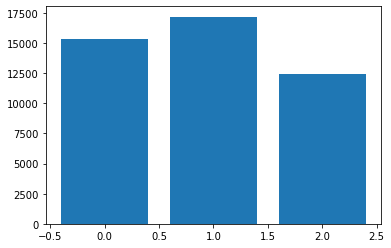

In [65]:
count_and_plot(label)

Class = 0, n = 17189 (38.244%)
Class = 2, n = 17189 (38.244%)
Class = 1, n = 17189 (38.244%)


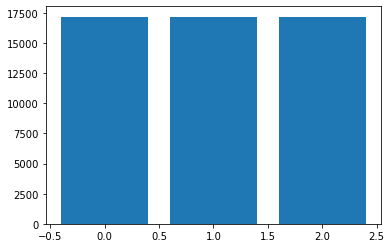

In [66]:
from imblearn.over_sampling import SMOTE
feature_resampled, target_resampled = SMOTE(random_state=0).fit_resample(feature,label)
count_and_plot(target_resampled)

# SMOTE 알고리즘 후
# 각각 17189개로 class imbalance 조정

In [14]:
feature_resampled

,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,Robot_LeftFoot.X,...,Robot_RightUpLeg.Z,Robot_RightLeg.X,Robot_RightLeg.Y,Robot_RightLeg.Z,Robot_RightFoot.X,Robot_RightFoot.Y,Robot_RightFoot.Z,Robot_RightToeBase.X,Robot_RightToeBase.Y,Robot_RightToeBase.Z
0,0.014469,0.657318,-0.174980,-0.087715,0.570961,-0.207636,-0.258852,0.485350,0.207280,-0.270620,...,-0.206519,0.239237,0.563264,0.235140,0.234115,0.101813,0.307666,0.246179,-0.010447,0.399674
1,0.015042,0.655393,-0.171119,-0.087102,0.568806,-0.203293,-0.257881,0.486372,0.212413,-0.269969,...,-0.202244,0.239013,0.565066,0.239753,0.234339,0.104257,0.316286,0.246404,-0.007073,0.409416
2,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
3,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
4,0.015032,0.655023,-0.170247,-0.087141,0.568422,-0.202286,-0.257976,0.486619,0.213522,-0.270155,...,-0.201181,0.238487,0.565081,0.240956,0.233523,0.104367,0.318038,0.245463,-0.006849,0.411320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51562,0.002637,1.112699,-0.003949,-0.101884,1.024028,-0.017307,-0.109589,0.568017,-0.045010,-0.102207,...,-0.020486,0.105654,0.571009,-0.049910,0.095116,0.104003,-0.054130,0.076971,0.019985,0.063449
51563,-0.005201,1.106067,-0.024990,-0.111172,1.020573,-0.045642,-0.058483,0.567985,-0.011936,0.004877,...,-0.050821,0.154837,0.573723,0.025397,0.089023,0.281826,-0.333330,0.047064,0.142935,-0.345253
51564,0.000907,1.107188,-0.017333,-0.101440,1.015510,-0.026608,-0.086519,0.563880,0.041071,-0.057258,...,-0.018722,0.140218,0.575006,0.069139,0.171601,0.168293,-0.158508,0.123224,0.041908,-0.104657
51565,0.003911,1.105150,-0.021121,-0.096949,1.011381,-0.021640,-0.084570,0.583397,0.137844,-0.037608,...,-0.027171,0.114132,0.570290,-0.093803,0.062806,0.122633,-0.216886,-0.022431,0.042594,-0.130048


In [15]:
target_resampled = np_utils.to_categorical(target_resampled)

In [16]:
target_resampled

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

nor = Normalizer() #이게 1순위 76 / 71  MMS+nor-72/60
rob = RobustScaler() # 이게 2순위
sc = StandardScaler() # 이게 3순위

# feature_resampled = sc.fit_transform(feature_resampled)
feature_resampled = nor.fit_transform(feature_resampled)

In [18]:
print("독립변수 : {}".format(feature_resampled.shape))
print("종속변수 : {}".format(target_resampled.shape))

독립변수 : (51567, 27)
종속변수 : (51567, 3)


In [19]:
from tensorflow import keras

def create_model():
    model = Sequential([
        keras.layers.Dense(units=500, activation='sigmoid', input_shape=(27,)),
        keras.layers.Dense(units=250, activation='relu'),
        keras.layers.Dense(units=125, activation='relu'),
        keras.layers.Dense(units=3, activation='softmax') 
    ])
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [20]:
model = create_model()
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

history = model.fit(feature_resampled,target_resampled, epochs=100,callbacks=[early_stop])


Epoch 1/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.6767 - accuracy: 0.6494
Epoch 2/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.7919
Epoch 3/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8625
Epoch 4/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8968
Epoch 5/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.2301 - accuracy: 0.9166
Epoch 6/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.1924 - accuracy: 0.9297
Epoch 7/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.1704 - accuracy: 0.9381
Epoch 8/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.1622 - accuracy: 0.9413
Epoch 9/100
1612/1612 [==============================] - 3s 2ms/step - loss: 0.1584 - accuracy: 0.9436
Epoch 10/100
1612/1612 [==============================] - 3s 2ms/step - l

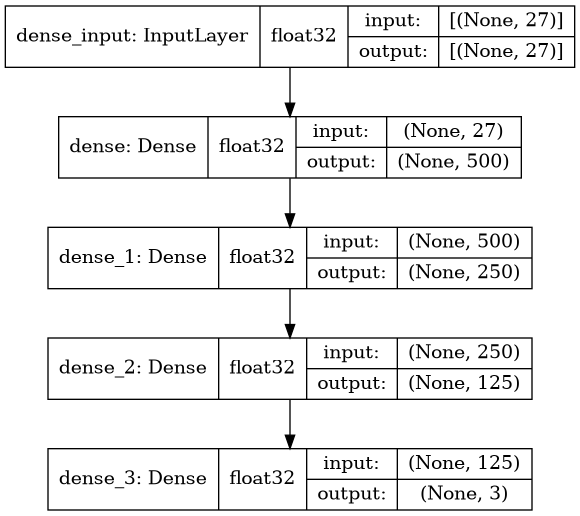

In [21]:
tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/my_MLP.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

Text(0, 0.5, 'Loss')

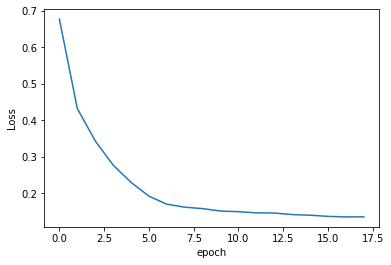

In [22]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

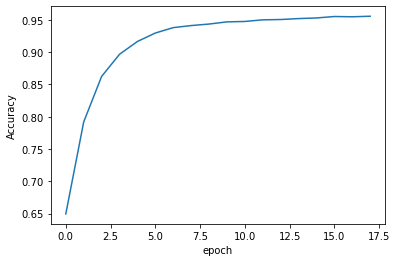

In [23]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("Accuracy")

# MLP 기본 모델 만들기

# 전체 데이터 세트를 훈련용 데이터세트로 집어넣은 결과
# 테스트 데이터세트 넣어서 테스트 해보기.

In [24]:
test1 = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Final/TestAct1.csv')
test2 = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Final/TestAct2.csv')
print(test1.shape)
print(test2.shape)

(1603, 28)
(1046, 28)


In [25]:
feature1 = test1.iloc[:,:-1]
target1 = test1['activity']

feature2 = test2.iloc[:,:-1]
target2 = test2['activity']

In [26]:
le.fit(target1)
label1 = le.transform(target1)
LABEL1 = le.inverse_transform(label1)
print(label1, type(label1), le.classes_)
target1_resampled = np_utils.to_categorical(label1)


le.fit(target2)
label2 = le.transform(target2)
LABEL2 = le.inverse_transform(label2)
print(label2, type(label2), le.classes_)
target2_resampled = np_utils.to_categorical(label2)

[1 1 1 ... 1 1 1] <class 'numpy.ndarray'> ['sit' 'stand' 'walking']
[1 1 1 ... 1 1 1] <class 'numpy.ndarray'> ['sit' 'stand' 'walking']


In [27]:
pred = model.predict(feature1)
pred = np.argmax(pred, axis=1)
print(pred)
print(target1_resampled)

pred2 = model.predict(feature2)
pred2 = np.argmax(pred2, axis=1)
print(pred2)
print(target2_resampled)

[1 1 1 ... 1 1 1]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[1 1 1 ... 1 1 1]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [28]:
PRED = le.inverse_transform(pred)
PRED2 = le.inverse_transform(pred2)

In [29]:
loss, acc = model.evaluate(feature1,target1_resampled, verbose=2)
print("model acc : {}%".format(100*acc))

51/51 - 0s - loss: 0.6868 - accuracy: 0.7648
model acc : 76.48159861564636%


In [30]:
loss, acc = model.evaluate(feature2,target2_resampled, verbose=2)
print("model acc : {}%".format(100*acc))

33/33 - 0s - loss: 1.6863 - accuracy: 0.6979
model acc : 69.78967785835266%


In [33]:
counting = 0
pr=[]
re=[]
co=[]
check=[]
frame_acc=[]

for pred,target in zip(PRED, LABEL1):
    pr.append(pred)
    re.append(target)
    if pred == target:
        counting +=1
        check.append('O')
        co.append(counting)
    elif pred != target:
        counting +=0
        co.append(counting)
        check.append('X')
    acc = counting/len(PRED) * 100
    frame_acc.append(acc)
    
TEST1_Result = pd.DataFrame(list(zip(pr,re,check,co,frame_acc)), columns = ['predict','real','check' ,'count','accuracy'])
print(TEST1_Result)
TEST1_Result.to_csv('TEST1_Result.csv', index=False)

     predict   real check  count   accuracy
0      stand  stand     O      1   0.062383
1      stand  stand     O      2   0.124766
2      stand  stand     O      3   0.187149
3      stand  stand     O      4   0.249532
4      stand  stand     O      5   0.311915
...      ...    ...   ...    ...        ...
1598   stand  stand     O   1222  76.232065
1599   stand  stand     O   1223  76.294448
1600   stand  stand     O   1224  76.356831
1601   stand  stand     O   1225  76.419214
1602   stand  stand     O   1226  76.481597

[1603 rows x 5 columns]


In [34]:
counting = 0
pr=[]
re=[]
co=[]
check=[]
frame_acc=[]
for pred,target in zip(PRED2, LABEL2):
    pr.append(pred)
    re.append(target)
    if pred == target:
        counting +=1
        check.append('O')
        co.append(counting)
    elif pred != target:
        counting +=0
        co.append(counting)
        check.append('X')
    acc = counting/len(PRED2) * 100
    frame_acc.append(acc)
    
TEST2_Result = pd.DataFrame(list(zip(pr,re,check,co,frame_acc)), columns = ['predict','real','check' ,'count','accuracy'])
print(TEST2_Result)
TEST2_Result.to_csv('TEST2_Result.csv', index=False)

     predict   real check  count   accuracy
0      stand  stand     O      1   0.095602
1      stand  stand     O      2   0.191205
2      stand  stand     O      3   0.286807
3      stand  stand     O      4   0.382409
4      stand  stand     O      5   0.478011
...      ...    ...   ...    ...        ...
1041   stand  stand     O    726  69.407266
1042   stand  stand     O    727  69.502868
1043   stand  stand     O    728  69.598470
1044   stand  stand     O    729  69.694073
1045   stand  stand     O    730  69.789675

[1046 rows x 5 columns]


# TEST1 / TEST2 의 precision값(정답에 대한 예측값) Recall(동작에대한 실제 Label값) 여부 카운트
# Precision = 모델이 예측한 결과중 실제 값과 일치하는 비율
# Recall = 실제 값중에서 모델이 예측한 값과 일치하는 비율

In [37]:
testResult1 = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Final/TEST1_Result.csv')

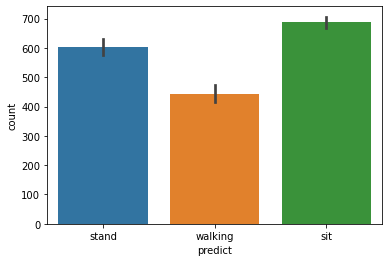

In [48]:
sns.barplot(data=testResult1, x='predict', y='count')
plt.show()

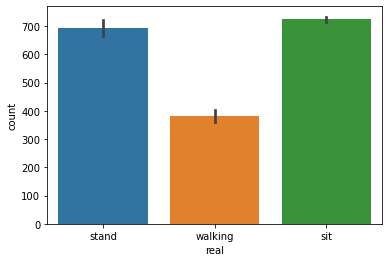

In [45]:
sns.barplot(data=testResult1, x='real', y='count')
plt.show()

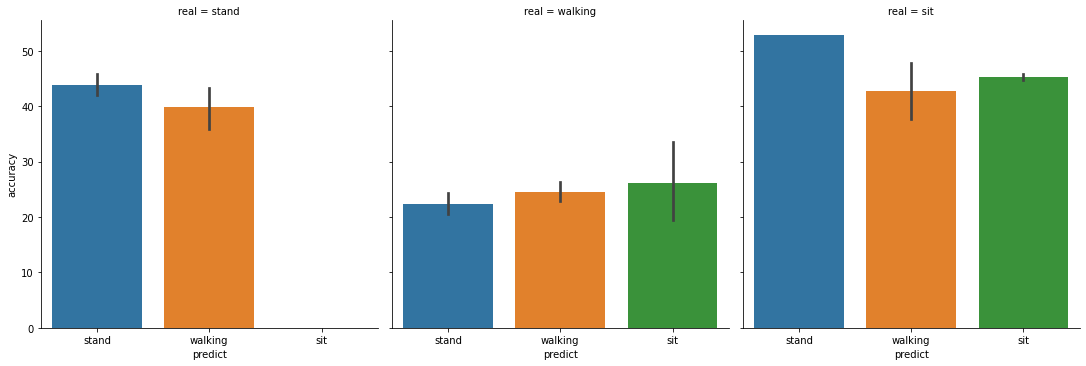

In [53]:
sns.catplot(data=testResult1, x='predict', y='accuracy', kind='bar', col='real')
plt.show()

In [ ]:
sns.heatmap()